# Introducción

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

# Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:
1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, línea de abonado digital) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:
- Seguridad en Internet: software antivirus (ProtecciónDeDispositivo) y un bloqueador de sitios web maliciosos (SeguridadEnLínea).
- Una línea de soporte técnico (SoporteTécnico).
- Almacenamiento de archivos en la nube y backup de datos (BackupOnline).
- Streaming de TV (StreamingTV) y directorio de películas (StreamingPelículas).

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

# Objetivos 

Los objetivos principales son:
1. Realizar una Exploración de Datos, analizando los diferentes Datasets.
2. Crear modelos de Machine Learning que permitirán predecir la probabilidad de cancelación de clientes.
3. Evaluar los modelos creados con la métrica principal AUC-ROC.
4. Preparar informe respectivo a los modelos y sus resultados.

# Descripción de datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` - información del contracto;
- `personal.csv` - datos personales del cliente;
- `internet.csv` - información sobre los servicios de Internet;
- `phone.csv`    - información sobre los servicios telefónicos.

En cada archivo, la columna `costumerID`(ID de cliente) contiene un código único asignado a cada cliente.

# Plan de trabajo

Para poder cumplir con lo requerido para este proyecto, iniciaremos con las Librerías. Después con los Datos, los cuales abriremos y le echaremos un primer vistazo. Una vez visto y analizado si existen datos equivocados/faltantes, pasaremos a hacer la corrección respectiva. Analizaremos con gráficos algunas columnas que podrían tener algo en común por sobre la gente que ha cancelado sus planes con la compañía Interconnect. Una vez hechos los gráficos y analizados, hacemos una pequeña conclusión, respondiendo algunas preguntas. Además podríamos sacar una hipótesis.

Posteriormente, avanzaremos con nuestros 6 modelos de Machine Learning. Los cuales serían:

- Regresión Logística
- DecisionTreeClassifier
- RandomForestClassifier
- CatBoost Classifier
- LGBM Classifier
- KNeighbors Classifier

Y veremos cuál de estos modelos nos arroja el mejor resultado y a su vez, el "Most Important Feature", para poder indicar en dónde debe atacar la compañía Interconnect, para poder quizás retener a más clientes.


# Librerías y Datos

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sn

# Lo necesario para nuestro modelo de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

## Datos 

In [2]:
try:
    data_contract = pd.read_csv('contract.csv')
except:
    data_contract = pd.read_csv('/datasets/final_provider/contract.csv')
try:
    data_personal = pd.read_csv('personal.csv')
except:
    data_personal = pd.read_csv('/datasets/final_provider/personal.csv')
try:
    data_internet = pd.read_csv('internet.csv')
except:
    data_internet = pd.read_csv('/datasets/final_provider/internet.csv')
try:
    data_phone = pd.read_csv('phone.csv')
except:
    data_phone = pd.read_csv('/datasets/final_provider/phone.csv')

# Exploración de Datos

### Dataset de Contrato

In [3]:
data_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
data_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

No observamos datos faltantes.

In [6]:
data_contract.duplicated().sum()

0

No tenemos datos duplicados

### Dataset de Personal

In [7]:
data_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
data_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

No observamos datos faltantes.

In [10]:
data_personal.duplicated().sum()

0

No tenemos datos duplicados

### Dataset de Internet

In [11]:
data_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [12]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [13]:
data_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

No se observan datos faltantes tampoco.

In [14]:
data_internet.duplicated().sum()

0

No tenemos datos duplicados

### Dataset de Phone

In [15]:
data_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [16]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [17]:
data_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

No se observan datos faltantes.

In [18]:
data_phone.duplicated().sum()

0

No tenemos datos duplicados

#### Observaciones generales de los Dataset

Como escrito en la parte de Descripción de Datos, observamos todos los Datasets contienen la columna `costumerID`. Y no tienen datos faltantes.

Para todos los datasets, tendremos que cambiar las columnas a minúsculas.

- En el dataset `data_contract`, podemos hacer lo siguiente: 
    - la columna `BeginDate` cambiar a 'datetime'. 
    - las columna `PaperlessBilling`cambiar a 'int'.
    - Las columnas `Type` y `PaymentMethod`cambiar a 'category'.
    - la columna `TotalCharges` cambiar a 'float'.

- En el dataset `data_personal`, podemos hace lo siguiente:
    - las columnas `gender`, `Partner` y `Dependents`  cambiar a 'int'.
    

- En el dataset `data_internet`, podemos hacer lo siguiente:
    - la columna  cambiar a 'category'.
    - las columnas`InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` y `StreamingMovies` cambiar 'category'.

- En el dataset `data_phone`podemos hacer lo siguiente:
    - la columna `MultipleLines`cambiar a 'category'.

### Corrección de Datos

In [19]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [20]:
data_contract['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [21]:
# Dataset de contrato:
data_contract['BeginDate']=pd.to_datetime(data_contract['BeginDate'], format='%Y-%m-%d')
data_contract['PaperlessBilling'] = data_contract['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
data_contract['Type']=data_contract['Type'].astype('category')
data_contract['PaymentMethod']=data_contract['PaymentMethod'].astype('category')
data_contract['TotalCharges']=pd.to_numeric(data_contract['TotalCharges'], errors='coerce')
data_contract['churn'] = (data_contract['EndDate'] != "No").astype("int")

Podríamos crear una columna `days` obtenidos de la diferencia entre `EndDate` y `BeginDate`. Los datos se ingresarán en el formato presentado (Año-mes-día 00:00:00), para hacerlo más fácil de cambiarlo a datetime posteriormente.

In [22]:
data_contract['EndDate'] = data_contract['EndDate'].replace('No', '2020-02-01 00:00:00')
data_contract['EndDate'] = pd.to_datetime(data_contract['EndDate'], format='%Y-%m-%d', errors = 'coerce')

In [23]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7043 non-null   int64         
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 399.4+ KB


In [24]:
data_contract['days']=(data_contract['EndDate'] - data_contract['BeginDate']).dt.days
data_contract['days'].unique()

array([  31, 1036,   61, 1371,  245,  671,  306,  853, 1888,  396,  488,
       1767, 1491,  761, 2102, 1584, 2163,  304,  641,   30,  365, 1492,
        914, 1431, 2191,  518,   62,  822,  153, 1401, 1033,  335, 2132,
       1918, 1310,  456, 1826,  549, 2010, 1432,  275,   92,  945, 1523,
       1949, 1706,  337,  214, 1279,  276, 1067, 1461,  883, 1979, 1157,
       2071,  975, 1675, 1126, 1095,  303, 1248,  184,   91,  215,  123,
       1006, 2041,  702, 1737,  242, 1857,  457,  427,  610, 1614,  395,
       1218, 1798,  730, 1340,  579,  122, 1645, 1553,  580, 1795,  487,
       1583,  548,  974, 1156, 1309, 1917,  640,  760,  334, 2101,  669,
       1676, 1856,  792,  852,    0, 1217,  699, 1186, 1065, 1703,  273,
        607, 1003, 1369,  609, 1005, 1399, 1887, 1187, 1765, 2129,  638,
       1522,  183, 1064, 1338, 2160,  972,  244,  791,  426, 1125, 1796,
       2130, 1034, 1430,  913, 2040, 1278, 1400, 2009,  944, 1734, 2099,
       1764,  700,  668, 1736, 1370, 1644, 2070,  8

Podemos eliminar las dos columnas con fechas.

In [25]:
data_contract_final = data_contract.drop(['BeginDate', 'EndDate'], axis=1)
data_contract_final['days'] = data_contract_final['days'].astype('float64') 
data_contract_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Type              7043 non-null   category
 2   PaperlessBilling  7043 non-null   int64   
 3   PaymentMethod     7043 non-null   category
 4   MonthlyCharges    7043 non-null   float64 
 5   TotalCharges      7032 non-null   float64 
 6   churn             7043 non-null   int64   
 7   days              7043 non-null   float64 
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 344.3+ KB


Con el cambio hecho al tipo float en `TotalCharges`, generamos datos faltantes. Veamos esta columna.

In [26]:
nan_contract = data_contract_final.query('TotalCharges.isna()')
nan_contract

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,days
488,4472-LVYGI,Two year,1,Bank transfer (automatic),52.55,NaN,0,0.0
753,3115-CZMZD,Two year,0,Mailed check,20.25,NaN,0,0.0
936,5709-LVOEQ,Two year,0,Mailed check,80.85,NaN,0,0.0
1082,4367-NUYAO,Two year,0,Mailed check,25.75,NaN,0,0.0
1340,1371-DWPAZ,Two year,0,Credit card (automatic),56.05,NaN,0,0.0
3331,7644-OMVMY,Two year,0,Mailed check,19.85,NaN,0,0.0
3826,3213-VVOLG,Two year,0,Mailed check,25.35,NaN,0,0.0
4380,2520-SGTTA,Two year,0,Mailed check,20.00,NaN,0,0.0
5218,2923-ARZLG,One year,1,Mailed check,19.70,NaN,0,0.0
6670,4075-WKNIU,Two year,0,Mailed check,73.35,NaN,0,0.0


Según observamos, estos clientes tienen una fecha de inicio el 2020-02-01, que podría sugerir que son clientes nuevos. 

In [27]:
# Rellenamos los valores NaN con valor 0
data_contract_final['TotalCharges'] = data_contract_final['TotalCharges'].fillna(0)

In [28]:
#Revisemos si quedó bien
data_contract_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Type              7043 non-null   category
 2   PaperlessBilling  7043 non-null   int64   
 3   PaymentMethod     7043 non-null   category
 4   MonthlyCharges    7043 non-null   float64 
 5   TotalCharges      7043 non-null   float64 
 6   churn             7043 non-null   int64   
 7   days              7043 non-null   float64 
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 344.3+ KB


In [29]:
#Dataset de Personal:
data_personal['gender'] = data_personal['gender'].replace({'Male': 0, 'Female': 1})
data_personal['Partner'] = data_personal['Partner'].replace({'Yes': 1, 'No': 0})
data_personal['Dependents'] = data_personal['Dependents'].replace({'Yes': 1, 'No': 0})

In [30]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   int64 
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   int64 
 4   Dependents     7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


In [31]:
data_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,1,0
1,5575-GNVDE,0,0,0,0
2,3668-QPYBK,0,0,0,0
3,7795-CFOCW,0,0,0,0
4,9237-HQITU,1,0,0,0


In [32]:
data_personal['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [33]:
data_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [34]:
data_internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

In [35]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [36]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [37]:
# Transformemos todas las columnas en minúsculas en los datasets:
data_contract_final.columns = data_contract_final.columns.str.lower()
data_personal.columns = data_personal.columns.str.lower()
data_internet.columns = data_internet.columns.str.lower()
data_phone.columns = data_phone.columns.str.lower()

data_contract_final.info()
data_personal.info()
data_internet.info()
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   object  
 1   type              7043 non-null   category
 2   paperlessbilling  7043 non-null   int64   
 3   paymentmethod     7043 non-null   category
 4   monthlycharges    7043 non-null   float64 
 5   totalcharges      7043 non-null   float64 
 6   churn             7043 non-null   int64   
 7   days              7043 non-null   float64 
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 344.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   int64 
 2   seniorcitizen  7043 non-null   int64 
 3   partner    

Podriamos empezar a juntar los diferentes Datasets en uno solo

In [38]:
# Creamos 1 solo Dataframe
final_data = pd.merge(data_contract_final, data_personal, on='customerid', how='outer')
final_data = pd.merge(    final_data, data_internet, on='customerid', how='outer')
final_data = pd.merge(    final_data,    data_phone, on='customerid', how='outer')

In [39]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   object  
 1   type              7043 non-null   category
 2   paperlessbilling  7043 non-null   int64   
 3   paymentmethod     7043 non-null   category
 4   monthlycharges    7043 non-null   float64 
 5   totalcharges      7043 non-null   float64 
 6   churn             7043 non-null   int64   
 7   days              7043 non-null   float64 
 8   gender            7043 non-null   int64   
 9   seniorcitizen     7043 non-null   int64   
 10  partner           7043 non-null   int64   
 11  dependents        7043 non-null   int64   
 12  internetservice   5517 non-null   object  
 13  onlinesecurity    5517 non-null   object  
 14  onlinebackup      5517 non-null   object  
 15  deviceprotection  5517 non-null   object  
 16  techsupport       5517 n

Generamos unos datos faltantes en:
    - la columna `multiplelines`, esto lo arreglaremos que todos los NaN, sean NO. Además, cambiamos el tipo de dato a categórica.
    - las columnas `internetservice`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv` y `streamingmovies`, arreglaremos en que todos los NaN, sean NO. Además, cambiamos el tipo del dato a 'int'.

In [40]:
final_data.head()

,customerid,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,days,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,0,31.0,1,0,1,0,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,One year,0,Mailed check,56.95,1889.50,0,1036.0,0,0,0,0,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,1,61.0,0,0,0,0,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371.0,0,0,0,0,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Month-to-month,1,Electronic check,70.70,151.65,1,61.0,1,0,0,0,Fiber optic,No,No,No,No,No,No,No


In [41]:
str_cols = final_data.columns[final_data.dtypes=='object']
final_data[str_cols] = final_data[str_cols].fillna('No')

In [42]:
#converting to categorical columns
final_data['onlinesecurity'] = (final_data['onlinesecurity'] == "Yes").astype("category")
final_data['onlinebackup'] = (final_data['onlinebackup'] == "Yes").astype("category")
final_data['techsupport'] = (final_data['techsupport'] == "Yes").astype("category")
final_data['deviceprotection'] = (final_data['deviceprotection'] == "Yes").astype("category")
final_data['streamingtv'] = (final_data['streamingtv'] == "Yes").astype("category")
final_data['streamingmovies'] = (final_data['streamingmovies'] == "Yes").astype("category")
final_data['internetservice'] = final_data['internetservice'].astype('category')
final_data['multiplelines'] = (final_data['multiplelines'] == "Yes").astype("category")

In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   object  
 1   type              7043 non-null   category
 2   paperlessbilling  7043 non-null   int64   
 3   paymentmethod     7043 non-null   category
 4   monthlycharges    7043 non-null   float64 
 5   totalcharges      7043 non-null   float64 
 6   churn             7043 non-null   int64   
 7   days              7043 non-null   float64 
 8   gender            7043 non-null   int64   
 9   seniorcitizen     7043 non-null   int64   
 10  partner           7043 non-null   int64   
 11  dependents        7043 non-null   int64   
 12  internetservice   7043 non-null   category
 13  onlinesecurity    7043 non-null   category
 14  onlinebackup      7043 non-null   category
 15  deviceprotection  7043 non-null   category
 16  techsupport       7043 n

In [44]:
final_data.head()

,customerid,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,days,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,0,31.0,1,0,1,0,DSL,False,True,False,False,False,False,False
1,5575-GNVDE,One year,0,Mailed check,56.95,1889.50,0,1036.0,0,0,0,0,DSL,True,False,True,False,False,False,False
2,3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,1,61.0,0,0,0,0,DSL,True,True,False,False,False,False,False
3,7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371.0,0,0,0,0,DSL,True,False,True,True,False,False,False
4,9237-HQITU,Month-to-month,1,Electronic check,70.70,151.65,1,61.0,1,0,0,0,Fiber optic,False,False,False,False,False,False,False


Logramos llenar todos los datos faltantes y cambiarlos al tipo que queríamos.

#### Preguntas a responder

Analisaremos nuestros datos, respondiendo las siguientes preguntas:

    - Cuál es la cantidad que se ha quedado y cancelado?
    - Cuál es el método de pago más popular?
    - Habrá diferencia de popularidad de método de pago entre distintas edades y géneros?
    - Cuál es el servicio de internet más popular?
    - Hay diferencia de servicio de internet entre distintas edades o generos?
    - Si la hay, cuál es la diferencia entre el cargo mensual o total entre distintas edades?    

# Análisis de Datos

<AxesSubplot:>

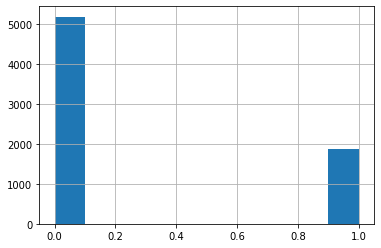

In [45]:
final_data['churn'].hist()

Viendo la primera parte, observamos que de todo el dataset, un poco menos de 2000 usuarios fueron los que se fueron y sobre 5000 se quedaron.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


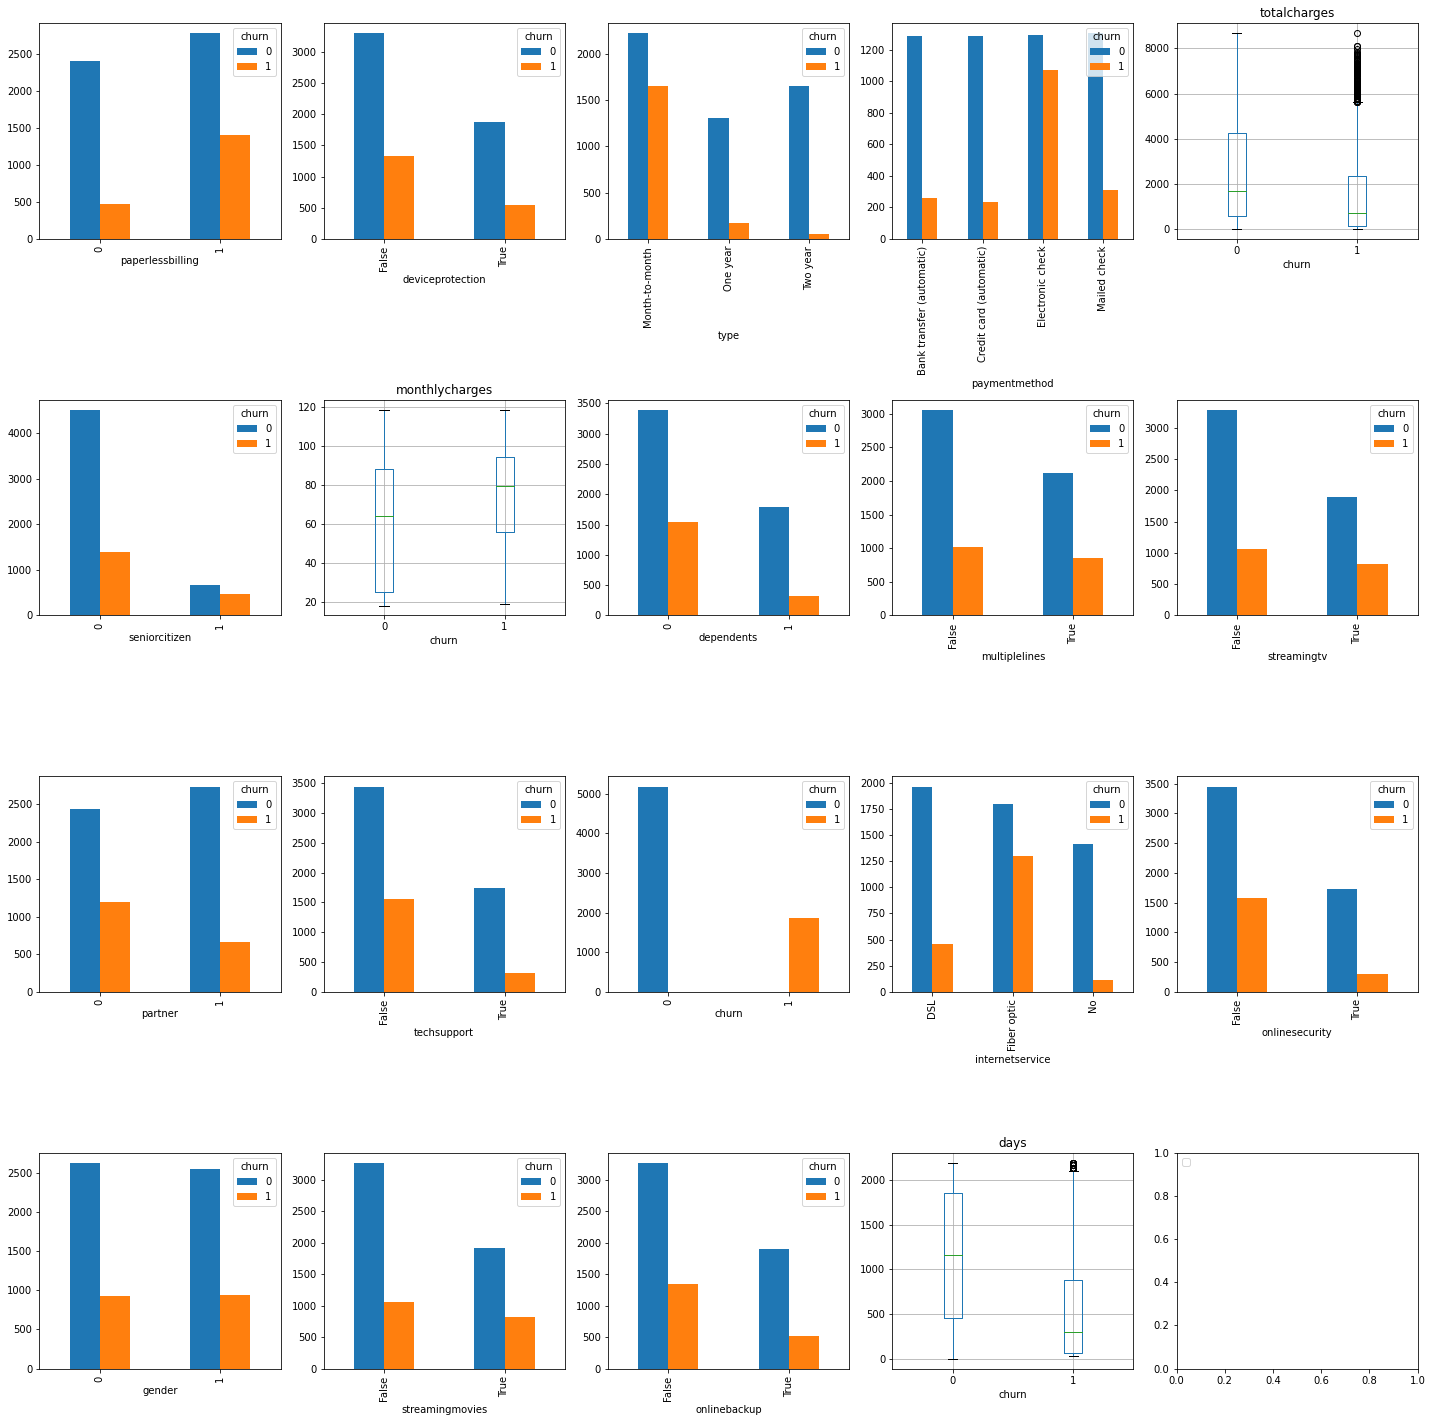

In [46]:
#Plot graphs with features vs the churn. Boxplots for discrete features, bar charts for categorical values
fig, axs = plt.subplots(4, len(final_data.columns) // 4, figsize=(20,20))
axs = axs.flatten()
cols=list(set(final_data.columns) - set(['customerid']))
for col, ax in zip(cols, axs):
    if final_data[col].dtype=='float64':
        final_data.boxplot(column=col, by='churn', ax=ax)
        plt.suptitle('')
    else:
        df = final_data.groupby([col, 'churn'])['churn'].count().unstack()
        df.plot(kind='bar', stacked=False, label='#churn (neg, pos)', ax=ax)
        plt.legend(loc='upper left')
    
plt.tight_layout()
plt.show()

De estos gráfico, por el momento, podemos observar lo siguiente:

- En la columna `gender`, no tiene mucha influencia si es Hombre o Mujer, se han quedado, como se han ido una cantidad bastante parecida.
- En la columna `partner` en cambio, observamos que los que no tienen un partner, se han ido más gente que los que si tienen un partner.
- En la columna `dependents`, observamos algo parecido como en la anterior. Los que no tienen dependencias, se han ido más que los que tienen dependencias. Pero aún así, la cantidad que se ha quedado es superior de los que no tienen dependencias a los que si tienen.
- En la columna `type`de contrato, los que más se han ido, son los que tienen pago mensual. Podría ser esto algo coincidente por el método de pago? Ya que da la facilidad de cancelar el servicio al mes y no propone mayor compromiso del cliente hacia el producto.
- En la columna `paymentmethod`, los que más se han ido, son los que pagaban con 'Electronic Check'. Pero aún así, la cantidad que quedan con ese método de pago, es alto.
- En las columnas correspondientes a la suscripción de internet, los que se fueron no tenían uno o más de un servicio contratado.
- Los que se fueron, no fueron ciudadanos senior.
- Además, podemos observar, que la gran mayoría que se fué, fueron usuarios que tenían cargos mensuales, que rondan los 80USD en promedio. 

#### Internet más popular

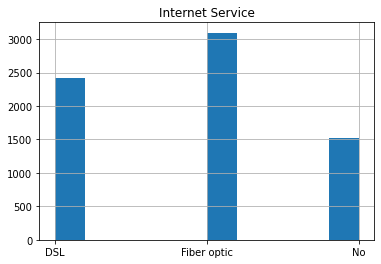

In [47]:
final_data['internetservice'].hist()
plt.title('Internet Service')
plt.show()

El servicio de internet más popular, es el de fibra óptica. De todas formas, tenemos una buena cantidad de usuarios que no tienen contratado Internet.

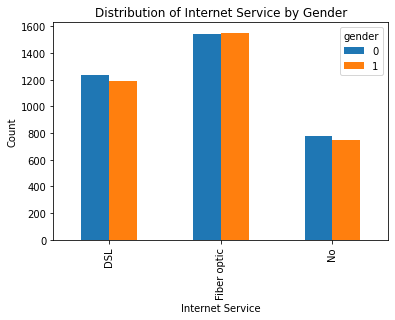

In [48]:
internet_df = final_data.groupby(['internetservice', 'gender']).size().unstack()

# Crear un gráfico de barras
internet_df.plot(kind='bar', stacked=False)

# Agregar etiquetas y título
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service by Gender')

# Mostrar el gráfico
plt.show()

El internet más popular, no está muy diferenciado según el género. Ambos servicios se comportan bastante parecidos. Solamente gana levemente la popularidad de la Fibra ótica entre las mujeres.

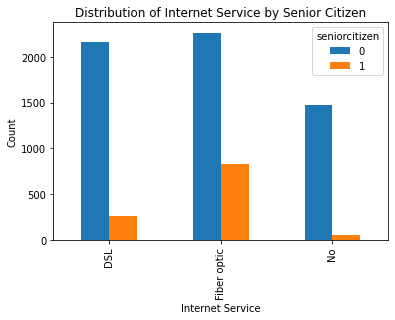

In [49]:
internet_data = final_data.groupby(['internetservice', 'seniorcitizen']).size().unstack()

# Crear un gráfico de barras
internet_data.plot(kind='bar', stacked=False)

# Agregar etiquetas y título
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service by Senior Citizen')

# Mostrar el gráfico
plt.show()

En esta comparación, pasa algo curioso. Los Senior Citizen, contrataron más Fibra Optica que DSL. En cambio, los más jóvenes, contratan tanto DSL como Firba Optica.

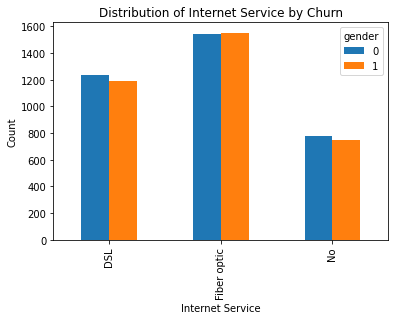

In [50]:
internet_churn = final_data.groupby(['internetservice', 'churn']).size().unstack()

# Crear un gráfico de barras
internet_df.plot(kind='bar', stacked=False)

# Agregar etiquetas y título
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service by Churn')

# Mostrar el gráfico
plt.show()

Los que más se han dado de baja el servicio en Internet, son aquellos que tenían Fibra Óptica. Aún así, hay una alta cantidad que tenía DSL y otros que no tenían el servicio.

#### Método de pago más popular

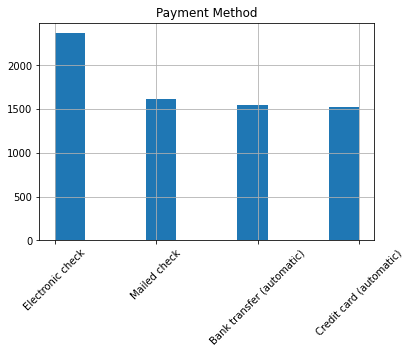

In [51]:
final_data['paymentmethod'].hist()

plt.xticks(rotation=45)
plt.title('Payment Method')
plt.show()

El método de pago que más sobresale, es el del cheque electrónico. Los otros tres están bastante parejos.

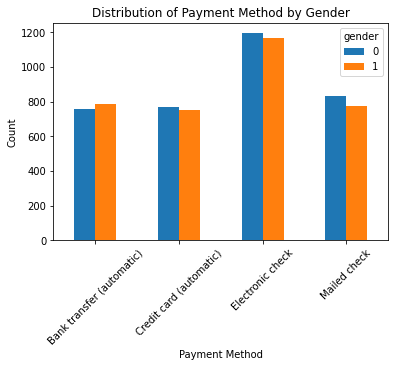

In [52]:
paymethod_df = final_data.groupby(['paymentmethod', 'gender']).size().unstack()

# Gráfico de barras
paymethod_df.plot(kind='bar', stacked=False)

#etiquetas y título
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Method by Gender')
plt.xticks(rotation=45)

plt.show()

Ambos géneros sobresaltan en la preferencia de pagar con el cheque electrónico.

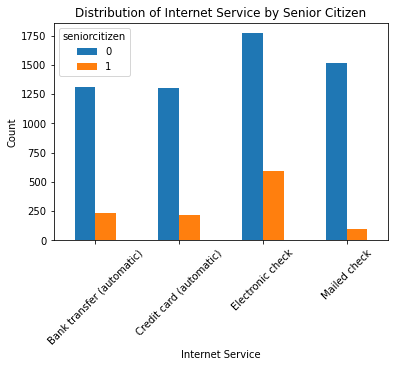

In [53]:
paymethod_data = final_data.groupby(['paymentmethod', 'seniorcitizen']).size().unstack()

# Gráfico de barras
paymethod_data.plot(kind='bar', stacked=False)

# Agregar etiquetas y título
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service by Senior Citizen')
plt.xticks(rotation=45)

plt.show()

Curiosamente, los ciudadanos senior, prefieren pagar con cheque electrónico, al igual que los ciudadanos más jóvenes. En estos últimos, sorprendentemente, prefieren enviar un cheque a cancelar con tarjeta de crédigo o Transferencia automática. Será porque podrían tener mejor supervisión de sus gastos? (No es que sea bajo el método de pago de transferencia automática o cargo a la tarjeta de crédito).

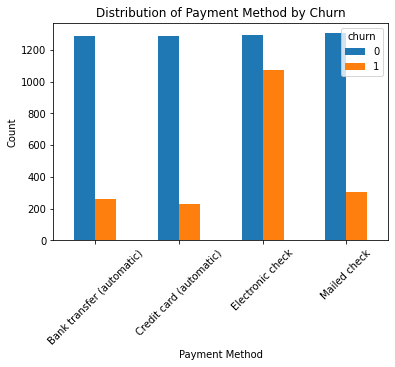

In [54]:
paymethod_churn = final_data.groupby(['paymentmethod', 'churn']).size().unstack()

# Gráfico de barras
paymethod_churn.plot(kind='bar', stacked=False)

#etiquetas y título
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Method by Churn')
plt.xticks(rotation=45)

plt.show()

Los clientes que pagaban con Cheque Electrónico son los que más dieron de bajar el servicio. Cheque por correo es seguido de cerca por Tarjeta de Crédito y Transferencia bancaria.

#### Cargo mensual o total por edad

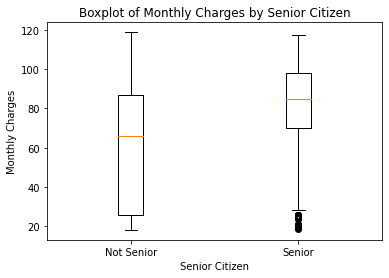

In [55]:
plt.boxplot([final_data[final_data['seniorcitizen'] == 0]['monthlycharges'], 
             final_data[final_data['seniorcitizen'] == 1]['monthlycharges']],
            labels=['Not Senior', 'Senior'])

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Senior Citizen')
plt.ylabel('Monthly Charges')

# Agregar un título al gráfico
plt.title('Boxplot of Monthly Charges by Senior Citizen')

# Mostrar el gráfico
plt.show()

En el pago mensual, observamos que los Senior, en promedio pagan más que los no senior. De todas formas, el promedio está más centrado en senior que en los no senior. También observamos valores atípicos en los Senior.

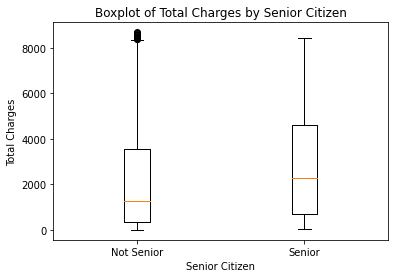

In [56]:
# totalcharges

plt.boxplot([final_data[final_data['seniorcitizen'] == 0]['totalcharges'], 
             final_data[final_data['seniorcitizen'] == 1]['totalcharges']],
            labels=['Not Senior', 'Senior'])

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Senior Citizen')
plt.ylabel('Total Charges')

# Agregar un título al gráfico
plt.title('Boxplot of Total Charges by Senior Citizen')

# Mostrar el gráfico
plt.show()

En el pago total, los Senior también pagan más en promedio. 

## Conclusión del análisis

Logramos obtener la información requerida para poder responder nuestras preguntas:

1. Cuál es la cantidad que se ha quedado y cancelado?

    **Respuesta: Cerca de 2000 personas han cancelado el servicio. Y cerca de 5000 se han quedado.**
    
2. Cuál es el método de pago más popular?

    **Respuesta: El método de pago más popular es el Cheque Electrónico.**
    
3. Habrá diferencia de popularidad de método de pago entre distintas edades y géneros?

    **Respuesta: Entre género no hay gran resalto de diferencia en popularidad de método de pago. Ambos géneros prefieren el Cheque Electrónico. Al igual que entre las edades, el senior citizen, como los jóvenes, prefieren el cheque electrónico.** 
    
4. Cuál es el servicio de internet más popular?

    **Respuesta: La fibra óptica es la más popular.**
    
    4a. Hay diferencia de servicio de internet entre distintas edades o generos?
    
    **Respuesta: Tanto los jóvenes, como el senior citizen prefieren la fibra óptica. Y en géneros, también prefieren la fibra óptica.**
    
    4b. Si la hay, cuál es la diferencia entre el cargo mensual o total entre distintas edades?
    
    **Respuesta: Tanto en el cargo mensual, como total, el senior citizen está pagando por el/los servicio/s que los jóvenes.**
    
Hipotesis: Podría ser que los clientes que se hayan ido, podrían haber encontrado una opción más barata o una mejor opción, en sentido, de que ofrecen más servicios por el mismo valor. U ofrecen el mismo servicio, pero por menor valor.    

# MODELOS

Ahora podemos pasar a la siguiente etapa. Crear nuestros modelos. Estos serán:

- Logistic Regression
- DecisionTreeClassifier
- RandomForestClassifier
- CatBoost Classifier
- LGBM Classifier
- KNeighbors Classifier

Observaremos cuál es el mejor modelo junto a su 'feature_importances' en los conjuntos de testeo y prueba. Y posteriormente lo aplicaremos al conjunto de validación.

In [57]:
#Primero Definamos las características numéricas y categóricas
numeric_features = ['monthlycharges', 'totalcharges', 'days']
categorical_features = ['type', 'paperlessbilling', 'paymentmethod', 'gender', 'seniorcitizen', 'partner', 'dependents',
                        'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                        'streamingtv', 'streamingmovies', 'multiplelines']

In [58]:
#Creamos nuestros feature (X) y target (y)
X = final_data.drop(columns=['customerid', 'churn'])
y = final_data['churn']

In [59]:
#Dividimos los datos en conjuntos de entrenamiento (70%), prueba (15%) y validación (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.50, random_state=1234)

In [60]:
#Definamos los transformers para características numércias y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

In [61]:
#Combinamos los transformers en una ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [62]:
#Aplicamos el preprocesamiento a los datos
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_valid_preprocessed = preprocessor.transform(X_valid)

In [63]:
# Definamos una función para entrenar y evaluar modelos con GridSearchCV
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    feature_importances = None

    if hasattr(best_model, 'feature_importances_'):
        feature_importances = best_model.feature_importances_

    return best_model, roc_auc, feature_importances

# Entrenamos y evaluamos los seis modelos con GridSearchCV
models_to_train = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('CatBoost Classifier', CatBoostClassifier(verbose=0)),
    ('LGBM Classifier', LGBMClassifier()),
    ('KNeighbors Classifier', KNeighborsClassifier())
]

#Parámetros para algunos modelos
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_kneighbors = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


results = []

for model_name, model in models_to_train:
    print(f"Training {model_name}...")
    
    if model_name == 'Logistic Regression':
        param_grid = param_grid_logistic
    
    elif model_name == 'Decision Tree Classifier':
        param_grid = param_grid_decision_tree
    
    elif model_name == 'Random Forest Classifier':
        param_grid = param_grid_random_forest
    elif model_name == 'KNeighbors Classifier':
        param_grid = param_grid_kneighbors

    elif model_name == 'CatBoost Classifier':
        param_grid = {
            'iterations': [100, 200],
            'learning_rate': [0.05, 0.1]
        }
    elif model_name == 'LGBM Classifier':
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1]
        }
    else:
        param_grid = {}

    best_model, roc_auc, feature_importances = train_and_evaluate_model(model, param_grid, X_train_preprocessed, y_train, X_test_preprocessed, y_test)
    results.append((model_name, best_model, roc_auc, feature_importances))
    print(f"{model_name} ROC-AUC: {roc_auc}")
    print()


Training Logistic Regression...
Logistic Regression ROC-AUC: 0.7116221488595438

Training Decision Tree Classifier...
Decision Tree Classifier ROC-AUC: 0.7149609843937574

Training Random Forest Classifier...
Random Forest Classifier ROC-AUC: 0.7190876350540216

Training CatBoost Classifier...
CatBoost Classifier ROC-AUC: 0.7635804321728691

Training LGBM Classifier...
LGBM Classifier ROC-AUC: 0.7635054021608644

Training KNeighbors Classifier...
KNeighbors Classifier ROC-AUC: 0.7127100840336135



                      Model   ROC-AUC Most Important Feature  Importance Value
0       Logistic Regression  0.711622                   None          0.000000
1  Decision Tree Classifier  0.714961          paymentmethod          0.258075
2  Random Forest Classifier  0.719088          paymentmethod          0.230033
3       CatBoost Classifier  0.763580          paymentmethod         45.314829
4           LGBM Classifier  0.763505          paymentmethod       1930.000000
5     KNeighbors Classifier  0.712710                   None          0.000000


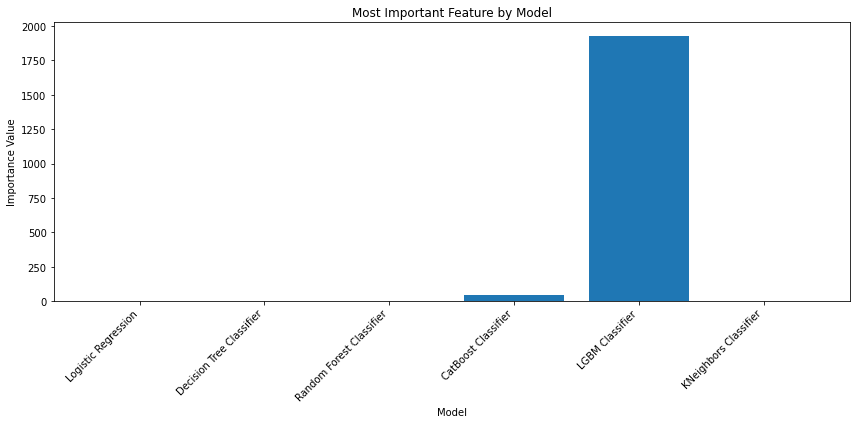

In [64]:
# Creamos una lista para almacenar los resultados
model_results = []

for model_name, best_model, roc_auc, feature_importances in results:
    most_important_feature = None
    max_importance = 0

    if feature_importances is not None:
        for i, importance in enumerate(feature_importances):
            if importance > max_importance:
                max_importance = importance
                most_important_feature = X.columns[i]

    model_results.append([model_name, roc_auc, most_important_feature, max_importance])

# Creamos un DataFrame a partir de los resultados
summary_df = pd.DataFrame(model_results, columns=['Model', 'ROC-AUC', 'Most Important Feature', 'Importance Value'])

# Mostramos el DataFrame
print(summary_df)

# Creamos un gráfico de barras para mostrar la característica más importante
plt.figure(figsize=(12, 6))
plt.bar(summary_df['Model'], summary_df['Importance Value'])
plt.xlabel('Model')
plt.ylabel('Importance Value')
plt.title('Most Important Feature by Model')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

De nuestros modelos, observamos lo siquiente:

- En overall, el modelo `Logistic Regression`, obtuvo el mejor valor 'ROC-AUC', sin features más importantes. Seuigo por El modelo `KNeighbors Classifier`
- El modelo `Random Forest Classifier` obtuvo un 'ROC-AUC' de 0.6652 con un feature más importante de 0.22 que es la columna `paymentmethod`. Los modelos `Decision Tree Classifier`, `CatBoost Classifier` y `LGBM Classifier` también contienen la columna `paymentmethod`como la featurea más importante, solo que en `LGBM Classifier`, esta es muy importante.

Veamos nuestro mejor modelo:

In [65]:
best_model

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

Nuestro mejor modelo es el `KNeighborsClassifier` con la metrica 'manhattan' y con 9 vecinos. Apliquemos nuestro mejor modelo al conjunto de validación

In [66]:
# Aplicamos el mejor modelo al conjunto de validación
X_valid_preprocessed = preprocessor.transform(X_valid)
y_valid_pred = best_model.predict(X_valid_preprocessed)
roc_auc_valid = roc_auc_score(y_valid, y_valid_pred)
print(f"ROC-AUC on Validation Set: {roc_auc_valid}")

# Obtenemos las importancias de las características del mejor modelo en el conjunto de validación
if hasattr(best_model, 'feature_importances_'):
    feature_importances_val = best_model.feature_importances_
    print("\nFeature Importances in Validation Set:")
    for i, importance in enumerate(feature_importances_val):
        print(f"Feature {i}: {importance}")

    # Creamos un gráfico de barras para mostrar las importancias de características en el conjunto de validación
    plt.figure(figsize=(12, 6))
    plt.bar(X.columns, feature_importances_val)
    plt.xlabel('Features')
    plt.ylabel('Importance Value')
    plt.title('Feature Importances in Validation Set')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print('\nEl modelo seleccionado no tiene "feature importances".')

ROC-AUC on Validation Set: 0.6986754966887416

El modelo seleccionado no tiene "feature importances".


Observamos que nuestro mejor modelo, el `KNeighborsClassifier` obtiene un 'ROC-AUC' levemente menor que en conjunto de entrenamiento y prueba, y a su vez, tampoco tiene features importantes.

## Conclusión de los modelos ML y comparando las preguntas anteriores

Según lo mostrado por los modelos y la posible hipótesis. Podríamos decir que la pérdida de clientes, al parecer no es que los servicios ofrecidos por Interconnect sean caros. Sino que es por el método de pago que ofrecen. Ya que en 4 de kis 6 modelos, la feature más importante es la columna `paymentmethod`. O sea, es un indício en dónde la empresa Interconnect debe atacar para que no haya tanta clientela que cancela su suscripción de servicios.

# Conclusión

- Realizamos la parte de la introducción al proyecto, con una pequeña reseña de la empresa Interconnect y sus productos ofrecidos. Después el objetivo de este proyecto y una pequeña descripción de los datos.
- Cargamos los datos (4 datasets) y los empezamos a analizar si hubo información faltante o tipos de datos erróneos.
- Nos encontramos con tipos de datos erróneos, los cuales se fueron cambiando una vez fusionado los 4 datasets en uno solo.
- Se efectuó una exploración de datos, pudiendo responder las consultas hechas antes de empezar esta exploración.
- Pudimos realizar todos los pasos según el plan de trabajo.
- No se encontró mayor dificultad para resolver las dudas según el plan de trabajo.
- El paso clave, para poder resolver la tarea, fue resolverlo con los modelos de Machine Learning, para saber cuál es el mejor modelo y cuál es el `feature` más importante dónde debe atacar la compañía.


Según el procedimiento con nuestros 6 modelos de Machine Learning, el que obtuvo mejor puntuación, fue el modelo `KNeighborsClassifier`con un `ROC-AUC: 0.6986` en el conjunto de validación.

# Recomendación 

Como recomendación para la empresa Interconnect, podría ocupar el modelo de `KNeighborsClassifier` para predecir si un cliente cancelaría o no su/s producto/s, y a su vez, atacar el método de pago para poder retener mayor clientela. Ya que, según lo analizado, la fuga de clientes no se debe por la edad, ni por género. Sino que por el método de pago vía cheque electrónico. El cual fue el `feature importances` que más destacó en 4 de 6 modelos de Machine Learning. A lo mejor, podrían dar mejores opciones a clientes que quieran pagar por ese medio.